# COLOR SPACES AND HISTOGRAM EQUALIZATION

we have been using matplotlib library and cvtColor function for showing images to you so far. Do you know why we were using cvtColor function? Do you know what does cvtFunction do?

cvtColor function provide us to transition between color spaces. OpenCV images works with BGR(blue,green,red) but matplotlib works with RGB(red, green, blue) color space. There are other color spaces like gray, HSV. We'll use this color spaces for object detection. They'll give us better solution than BGR color space.

## Gray Scaling

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("eiffel.jpg")
gray = cv2.imread("eiffel.jpg",0) # we've seen this before

frame = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(frame)
plt.show()

# we can also use cvtColor function for gray scaling
# cvtColor(image, transition type)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
plt.figure()
plt.imshow(gray, cmap='gray')
plt.show()

# let's print gray scaled image's shape
print(gray.shape)

#cv2.imshow("eiffel",gray)
#cv2.waitKey()
#cv2.destroyAllWindows()

error: /build/opencv-L2vuMj/opencv-3.2.0+dfsg/modules/imgproc/src/color.cpp:9716: error: (-215) scn == 3 || scn == 4 in function cvtColor


Do you know how gray scaling works?
In gray scaled image, each pixel's value is Mean of RGB values 
(Blue  + Green  + Red) / 3 as theoretically.
In pratically we are using weighted method. let's see what'll happen? 
Let's write our own cvtColor function.

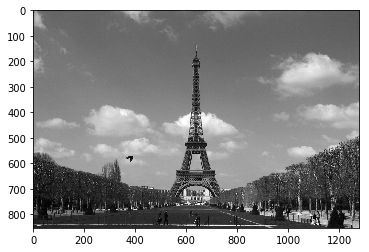

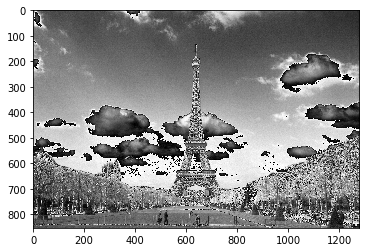

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("eiffel.jpg")
(h, w) = image.shape[:2]
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#let's create empty gray scaled image
gray = np.zeros([h,w], dtype = np.uint8)
w_method = np.zeros([h,w], dtype = np.uint8)


for y in range(0,h):
    for x in range(0,w):
        red, green, blue  = image[y,x] 
        gray[y,x] = (red * 0.2989 + green*0.5870 + blue*0.1140) 
        w_method[y,x] = (red + green + blue) /3
        

plt.figure()
plt.imshow(gray, cmap='gray')
plt.show()

plt.figure()
plt.imshow(w_method, cmap='gray')
plt.show()

#cv2.imshow("eiffel",gray)
#cv2.waitKey()
#cv2.destroyAllWindows()

results are different than expected right? 
The reason of this human eyes not work as RGB.
The order of color sensitivity of the human eye is green red and blue.
That's why we multiply green value by 0.587.

## HSV Space

we are using HSV space for color filtering

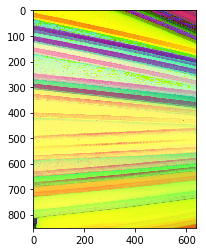

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("colourfull.jpg")

# this is main function for converting
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# this is hack for plotting with matplotlib
# if we just use cv2.imshow not matplotlib, we don't use this line
hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(hsv_image)
plt.show()

cv2.imshow("HSV",image)
cv2.waitKey()
cv2.destroyAllWindows()

# Split Colors

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("colourfull.jpg")

# we can reach 3 different channels directly
B, G, R = cv2.split(image)
zeros = np.zeros(image.shape[:2], dtype = "uint8")

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(image)
plt.show()

plt.figure()
plt.imshow(cv2.merge([R, zeros, zeros]))
plt.show()

plt.figure()
plt.imshow(cv2.merge([zeros, G, zeros]))
plt.show()

plt.figure()
plt.imshow(cv2.merge([zeros, zeros, B]))
plt.show()

#cv2.imshow("Red", cv2.merge([zeros, zeros, R]))
#cv2.imshow("Green", cv2.merge([zeros, G, zeros]))
#cv2.imshow("Blue", cv2.merge([B, zeros, zeros]))

#cv2.imshow("original",image)
#cv2.waitKey()
#cv2.destroyAllWindows()

ValueError: need more than 0 values to unpack

# Histogram Equalization

Histogram is a graphical representation of the intensity distribution of an image.

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# we are using gray scale images for histogram
gray = cv2.imread("eiffel.jpg",0)

plt.figure()
plt.hist(gray.ravel(),256,[0,256])
plt.show()

#dst = cv2.equalizeHist(gray)

AttributeError: 'NoneType' object has no attribute 'ravel'

this histogram graphic gives us, for example how many pixels have 150 value.
As you can see below, most of the image consist of sky's value, so most of pixels have sky's value.

![image function](hist.png)

Histogram equalization is a method that improves the contrast in an image, in order to stretch out the intensity range.

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# we are using gray scale images for histogram
gray = cv2.imread("eiffel.jpg",0)

dst = cv2.equalizeHist(gray)

plt.figure()
plt.imshow(gray,cmap='gray')
plt.show()

plt.figure()
plt.imshow(dst,cmap='gray')
plt.show()

#cv2.imshow("original",gray)
#cv2.imshow("histogram",dst)
#cv2.waitKey()
#cv2.destroyAllWindows()

TypeError: Image data cannot be converted to float

# Brightness and Contrast

we've seen addweight function in added 2 image. as the same way we are using this function for contrast and brightness

# Brightness

Brightness refers to the overall lightness or darkness of the image.

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# we are using gray scale images for histogram
image = cv2.imread("eiffel.jpg")

brightness = 64 # try for 32, 64, 127, 255

if brightness > 0:
    shadow = brightness
    highlight = 255
else:
    shadow = 0
    highlight = 255 + brightness
    
alpha_b = (highlight - shadow)/255
gamma_b = shadow # shadow = brightness value

image = cv2.addWeighted(image, alpha_b, image, 0, gamma_b)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(image)
plt.show()

#cv2.imshow("Brightness",image)
#cv2.waitKey()
#cv2.destroyAllWindows()

error: /build/opencv-L2vuMj/opencv-3.2.0+dfsg/modules/imgproc/src/color.cpp:9716: error: (-215) scn == 3 || scn == 4 in function cvtColor


# Contrast

Contrast is the difference in brightness between objects or regions

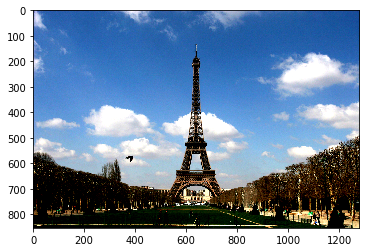

In [142]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# we are using gray scale images for histogram
image = cv2.imread("eiffel.jpg")

contrast = 32 # try for 32, 64, 127, 255

f = 131*(contrast + 127)/(127*(131-contrast))
alpha_c = f
gamma_c = 127*(1-f)

image = cv2.addWeighted(image, alpha_c, image, 0, gamma_c)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(image)
plt.show()

#cv2.imshow("Brightness",image)
#cv2.waitKey()
#cv2.destroyAllWindows()